In [1]:
import numpy as np
from scipy.optimize import  root as eqsolver
import time
from matplotlib import pyplot as plt

In [2]:
def feasible(f_params,bvec_guess):
    nvec=f_params[0]
    A=f_params[1]
    alpha=f_params[2]
    delta=f_params[3]
    beta=f_params[4]
    
    b2=bvec_guess[0]
    b3=bvec_guess[1]
    
    K=b2+b3
    w=(1-alpha)*A*((b2+b3)/np.sum(nvec))**alpha
    r=alpha*A*(np.sum(nvec)/(b2+b3))**(1-alpha)-delta
    C=np.zeros([3,])
    C[0]=nvec[0]*w-b2
    C[1]=nvec[1]*w+(1+r)*b2-b3
    C[2]=nvec[2]*w+(1+r)*b3
    
    K_cnstr=K<=0
    c_cnstr=C<=0

    b_cnstr=np.zeros([3,])>np.ones([3,])
    if C[0]==1:
        b_cnstr[0]=True
    if C[1]==1:
        b_cnstr[0]=True
        b_cnstr[1]=True
    if C[2]==1:
        b_cnstr[1]=True
        
    return b_cnstr, c_cnstr, K_cnstr    
    

In [3]:
fparams=(np.array([1,1,0.2]),1,0.35,0.6415,.442)
bvecguess1= np.array([1,1.2])
bvecguess2= np.array([.6,-0.001])
bvecguess3= np.array([.1,.1])

In [4]:
b_cnstr,c_cnstr,k_cnstr = feasible(fparams,bvecguess3)
print(b_cnstr[0],b_cnstr[1])
print(c_cnstr[0],c_cnstr[1],c_cnstr[2])
print(k_cnstr)

False False
False False False
False


# Exercise 2


In [5]:
def wage(f_params,k):
    nvec=f_params[0]
    A=f_params[1]
    alpha=f_params[2]
    w=(1-alpha)*A*((k)/np.sum(nvec))**alpha
    return w
def rate(f_params,k):
    nvec=f_params[0]
    A=f_params[1]
    alpha=f_params[2]
    delta=f_params[3]
    r=alpha*A*(np.sum(nvec)/(k))**(1-alpha)-delta
    return r
def u_pr(x,f_params):
    sigma=f_params[5]
    res=(1-sigma)*x**(-sigma)
    return res
def u(x,f_params):
    sigma=f_params[5]
    res=(x**(1-sigma)-1)/(1-sigma)
    return res

def obj(b,f_params):
    nvec=f_params[0]
    V=np.zeros([2,])
    k=b[0]+b[1]
    V[0]=u_pr(nvec[0]*wage(f_params,k)-b[0],f_params)\
        -beta*(1.+rate(f_params,k))*\
        u_pr(nvec[1]*wage(f_params,k)+(1.+rate(f_params,k))*b[0]-b[1],f_params)
    V[1]=u_pr(nvec[1]*wage(f_params,k)+(1.+rate(f_params,k))*b[0]-b[1],f_params)\
        -beta*(1.+rate(f_params,k))*\
        u_pr((1.+rate(f_params,k))*b[1]+nvec[2]*wage(f_params,k),f_params)
    return V


def get_SS(params,bvec_guess,SS_graphs):
    start_time=time.clock()
    f_params=(params[2],params[4],params[5],params[6],params[0],params[1])
    nvec=f_params[0]
    beta=f_params[4]
    alpha=f_params[2]
    L=params[3]
    A=f_params[1]
    delta=params[3]
    
    f= lambda b: obj(b,f_params)
    
    b_ss=eqsolver(f,bvec_guess,tol=params[-1]).x
    
    w_ss=wage(f_params,np.sum(b_ss))
    r_ss=rate(f_params,np.sum(b_ss))
    
    c_ss=np.zeros([3,])
    c_ss[0]=nvec[0]*w_ss-b_ss[0]
    c_ss[1]=nvec[1]*w_ss+(1+r_ss)*b_ss[0]-b_ss[1]
    c_ss[2]=nvec[2]*w_ss+(1+r_ss)*b_ss[1]
    
    K_ss=np.sum(b_ss)
    Y_ss=(A*K_ss**alpha)*L**(1-alpha)
    EulErr_ss=np.zeros([2,])
    EulErr_ss[0]=beta*(1+r_ss)*u_pr(c_ss[1],f_params)-u_pr(c_ss[0],f_params)
    EulErr_ss[1]=beta*(1+r_ss)*u_pr(c_ss[2],f_params)-u_pr(c_ss[1],f_params)
    C_ss=np.sum(c_ss)
    RCerr_ss=Y_ss-C_ss-delta*K_ss
    ss_time=time.clock()-start_time
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    if SS_graphs==True:
        plt.figure(1)
        plt.plot(c_ss)
        plt.title("Consumptions")
        plt.figure(2)
        plt.plot(np.append(b_ss,0))
        plt.title("Savings")
        plt.show()
    return ss_output 
        

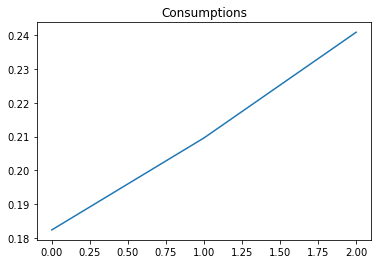

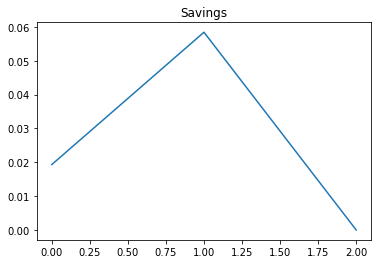

{'b_ss': array([ 0.01931253,  0.0584111 ]), 'c_ss': array([ 0.18241213,  0.20961468,  0.24087387]), 'w_ss': 0.20172465739033288, 'r_ss': 2.4330623391325288, 'K_ss': 0.077723625752951525, 'Y_ss': 0.68276037885958829, 'C_ss': 0.63290067293906982, 'EulErr_ss': array([  9.15008513e-10,  -1.77286097e-09]), 'RCerr_ss': -0.12113227073597491, 'ss_time': 0.005609585187410717}


In [6]:
beta = .442
sigma = 3
delta = .6415
A = 1
alpha = 0.35
nvec = np.array([1,1,.2])
L = 2.2
SS_tol = 1e-6
bvec_guess = np.array([.1,.1])
params=(beta,sigma,nvec,L,A,alpha,delta,SS_tol)

ss_output=get_SS(params,bvec_guess,True)
print(ss_output)

In [7]:
#Exercise 2.3

In [10]:
T=10
xi=1
xi_1=0
epsi=1e-9
K_init = np.sum(ss_output["b_ss"]*np.array([0.8,1.1]))
K_ss=ss_output["K_ss"]

K=np.linspace(K_init,K_ss,T+1)
K_pr=np.ones([T+1,])
f_params=(params[2],params[4],params[5],params[6],params[0],params[1])

In [11]:
def f_1(b2,x,W,R,f_params):
    n_vec=f_params[0]
    return u_pr(n_vec[0]*W[0]+(1+R[0])*b2[0]-x,f_params)-\
    beta*(1+R[1])*u_pr((1+R[1])*x+n_vec[2]*W[1],f_params)

def f_2(x,f_params,W,R,i):
    nvec=f_params[0]
    V=np.zeros([2,])
    V[0]=u_pr(nvec[0]*W[i-1]-x[0],f_params)\
        -beta*(1.+R[i])*\
        u_pr(nvec[1]*W[i]+(1+R[i])*x[0]-x[1],f_params)
    V[1]=u_pr(nvec[1]*W[i]+(1+R[i])*x[0]-x[1],f_params)\
        -beta*(1.+R[i+1])*\
        u_pr((1.+R[i+1])*x[1]+nvec[2]*W[i+1],f_params)
    return V

In [17]:
while np.linalg.norm(K_pr[:T]-K[:T],2)>epsi:
    
    print(np.linalg.norm(K_pr[:T]-K[:T],2))
    #print(K)    

    b2=np.zeros([T,])
    b3=np.zeros([T+1,])
    b2[0],b3[0]=ss_output["b_ss"]*np.array([0.8,1.1])

    K[:T]=xi_1*K_pr[:T]+(1-xi_1)*K[:T]
    
    W=wage(f_params,K)
    R=rate(f_params,K)

    obj_1 = lambda x: f_1(b2,x,W,R,f_params)    
    b3[1]=eqsolver(obj_1,.1,tol=params[-1]).x
    
    for i in range(1,T):
        obj_2=lambda x: f_2(x,f_params,W,R,i)
        b2[i],b3[i+1]=eqsolver(obj_2,np.array([.1,.1]),tol=params[-1]).x
      
        
    K_pr=b2+b3[:T]
    xi_1=xi
    


In [27]:
c_ss=np.zeros([3,T])
EulerErr=np.zeros([2,T])
Y=np.zeros([T,])
nvec=f_params[0]
beta=f_params[4]
alpha=f_params[2]
L=params[3]
A=f_params[1]
delta=params[3]
for i in range(T):
    c_ss[0,i]=nvec[0]*W[i]-b2[i]
    c_ss[1,i]=nvec[1]*W[i]+(1+R[i])*b2[i]-b3[i]
    c_ss[2,i]=nvec[2]*W[i]+(1+R[i])*b3[i]
    EulerErr[0,i]=beta*(1+R[i])*u_pr(c_ss[1,i],f_params)-u_pr(c_ss[0,i],f_params)
    EulerErr[1,i]=beta*(1+R[i])*u_pr(c_ss[2,i],f_params)-u_pr(c_ss[1,i],f_params)    
    
    Y[i]=(A*K[i]**alpha)*L**(1-alpha)
    
Con_err=Y-np.sum(c_ss)-delta*K[:T]

print(np.linalg.norm(EulerErr[0,:],np.inf))
print(np.linalg.norm(EulerErr[1,:],np.inf))
print(np.linalg.norm(Con_err,np.inf))


124.978335706
110.687184442
5.81600885754


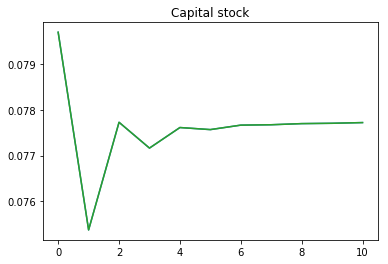

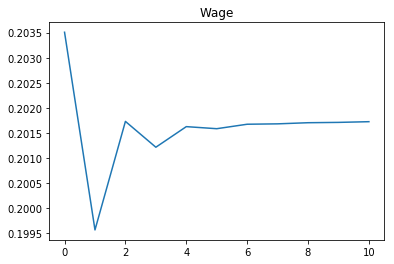

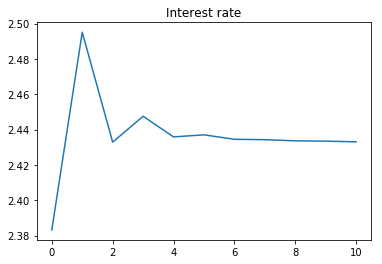

In [30]:
plt.figure(3)
plt.plot(K)
plt.title("Capital stock")
plt.figure(4)
plt.plot(W)
plt.title("Wage")
plt.figure(5)
plt.plot(R)
plt.title("Interest rate")
plt.show()